# Basic computer vision using KNN and SVM

The purpose of this project is to gain some experience working with the tools you will use throughout the course. You will learn:
- The basics of data loading and preparation
- Classification using the k-NN algorithm
- Classification using a Support Vector Machine (SVM)
- Calculation of metrics to assess the performance of your model




## Part 0. Dataset Preparation
To complete the project you will need to download the Cifar10 dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the project.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [67]:
from random import *
import skimage
import numpy as np 
import pandas as pd
from skimage.color import rgb2gray
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Prepare your dataset here and display samples here.
import tensorflow as tf
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, _, y_train, _ = train_test_split(x_train, y_train, train_size=0.1, stratify=y_train)
x_test, _, y_test, _ = train_test_split(x_test, y_test, train_size=0.1, stratify=y_test)

In [7]:
x_train.shape, y_train.shape

((5000, 32, 32, 3), (5000, 1))

In [8]:
x_test.shape, y_test.shape

((1000, 32, 32, 3), (1000, 1))

In [9]:
pd.DataFrame(y_test).value_counts()

0    100
1    100
2    100
3    100
4    100
5    100
6    100
7    100
8    100
9    100
dtype: int64

In [10]:
x_train_flatten = np.resize(x_train,(np.shape(x_train)[0],np.shape(x_train)[1]*np.shape(x_train)[2]*np.shape(x_train)[3]))/255
x_test_flatten = np.resize(x_test,(np.shape(x_test)[0],np.shape(x_test)[1]*np.shape(x_test)[2]*np.shape(x_test)[3]))/255

In [11]:
class0 = np.where(y_train == 0)
class1 = np.where(y_train == 1)
class2 = np.where(y_train == 2)
class3 = np.where(y_train == 3)
class4 = np.where(y_train == 4)
class5 = np.where(y_train == 5)
class6 = np.where(y_train == 6)
class7 = np.where(y_train == 7)
class8 = np.where(y_train == 8)
class9 = np.where(y_train == 9)

class_size = int(x_train.shape[0]/10)
classes = np.concatenate((np.reshape(class0[0], (1,class_size)), np.reshape(class1[0], (1,class_size)),
                          np.reshape(class2[0], (1,class_size)), np.reshape(class3[0], (1,class_size)),
                          np.reshape(class4[0], (1,class_size)), np.reshape(class5[0], (1,class_size)),
                          np.reshape(class6[0], (1,class_size)), np.reshape(class7[0], (1,class_size)),
                          np.reshape(class8[0], (1,class_size)), np.reshape(class9[0], (1,class_size))), axis=0)
np.shape(classes)

(10, 500)

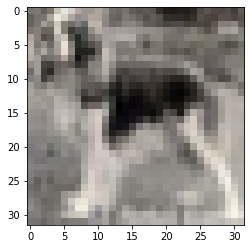

In [12]:
plt.imshow(x_train[7])

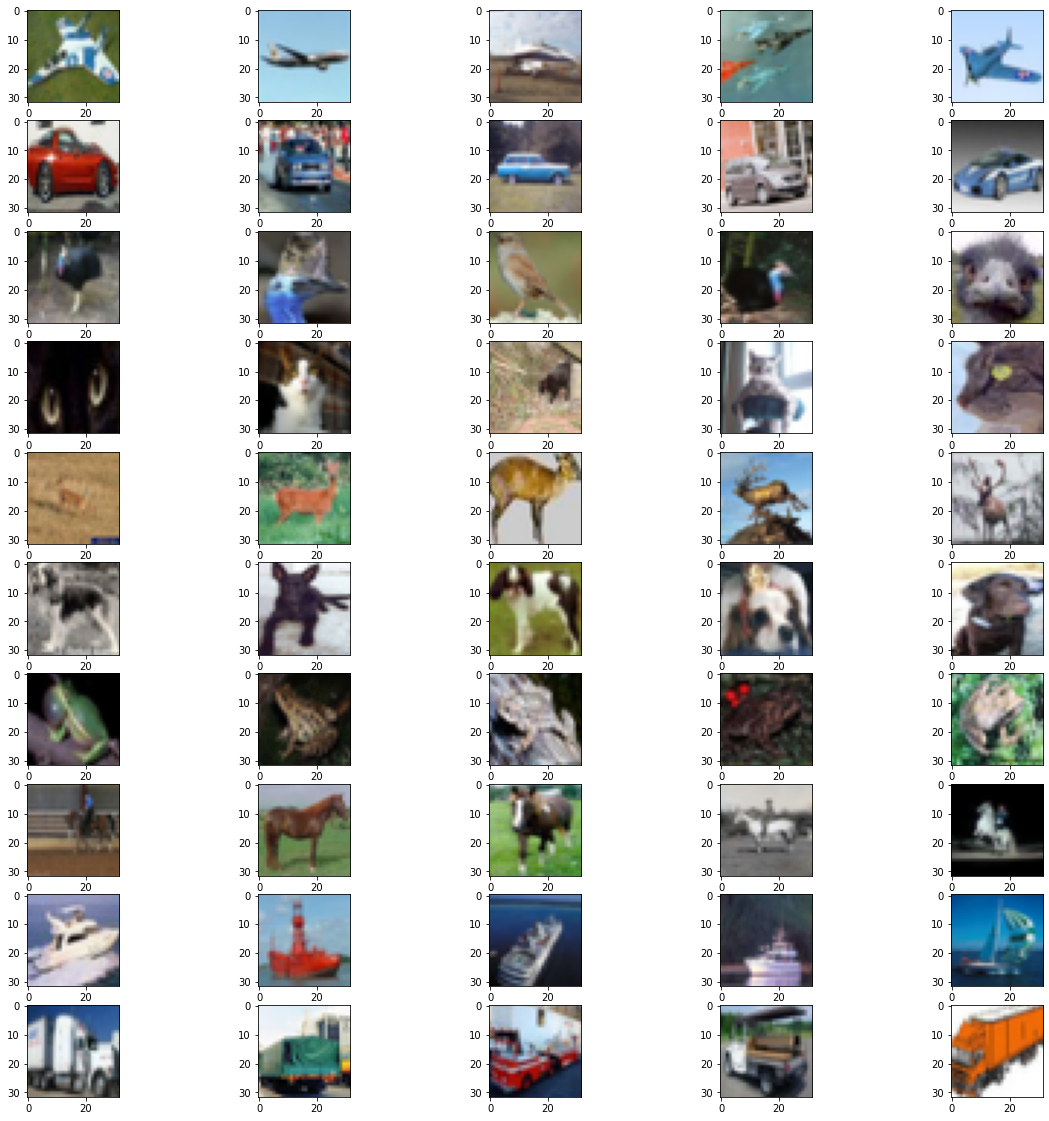

In [13]:
fig, axarr = plt.subplots(10, 5, figsize=(20,20))

for i in range(10):
    for j in range(5):
        image = x_train[classes[i][j]]
        axarr[i,j].imshow(image)

## Part 1. k-NN Classifier 
For this section you will implement a simple kNN Classifier on the Cifar10 dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results

### Bonus:

When you compute the distance metric you can acheive better performance if you vectorize the computation instead of using for loops to iterate through the values.




In [14]:
def euclidean_dist(a, b):
    return np.sqrt(np.sum(np.square(np.subtract(a, b))))

In [15]:
# Write your KNN class here
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        print(np.shape(X))

    def predict(self, X):

        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Distances between x and all examples in the training set
        distances = [euclidean_dist(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        k_neighbor_labels_list=list(np.transpose(k_neighbor_labels)[0])
        # return the most common class label
        most_common = Counter(k_neighbor_labels_list).most_common(1)
        return most_common[0][0]


In [16]:
K = [1,4,7,11]
predictions =[]
for k in range(1, 11):
    clf = KNN(k=k)
    clf.fit(x_train_flatten, y_train)
    predictions.append(clf.predict(x_test_flatten))
    print('At k = ',k)
    print("KNN classification accuracy", accuracy_score(predictions[-1],y_test))

(5000, 3072)
At k =  1
KNN classification accuracy 0.28
(5000, 3072)
At k =  2
KNN classification accuracy 0.28
(5000, 3072)
At k =  3
KNN classification accuracy 0.289
(5000, 3072)
At k =  4
KNN classification accuracy 0.29
(5000, 3072)
At k =  5
KNN classification accuracy 0.293
(5000, 3072)
At k =  6
KNN classification accuracy 0.285
(5000, 3072)
At k =  7
KNN classification accuracy 0.29
(5000, 3072)
At k =  8
KNN classification accuracy 0.285
(5000, 3072)
At k =  9
KNN classification accuracy 0.285
(5000, 3072)
At k =  10
KNN classification accuracy 0.285


----> The highest accuracy was at k=5
 
----> while the least accuracy was at k= 1,2

In [17]:
predictions

[array([4, 5, 8, 8, 0, 3, 3, 8, 4, 0, 8, 2, 2, 8, 4, 2, 4, 8, 2, 8, 2, 8,
        2, 8, 0, 2, 6, 5, 4, 8, 0, 6, 6, 9, 4, 1, 0, 7, 3, 3, 6, 3, 2, 0,
        2, 3, 0, 5, 3, 6, 4, 4, 2, 8, 2, 0, 4, 8, 2, 6, 6, 6, 5, 2, 7, 2,
        3, 8, 3, 5, 9, 3, 3, 2, 0, 0, 0, 4, 2, 4, 2, 3, 8, 4, 8, 2, 6, 8,
        3, 5, 8, 7, 3, 4, 8, 0, 7, 2, 0, 6, 5, 8, 3, 2, 7, 2, 4, 4, 2, 8,
        2, 6, 2, 0, 3, 9, 2, 8, 5, 2, 6, 4, 2, 3, 9, 2, 4, 4, 2, 2, 4, 0,
        4, 8, 0, 8, 9, 9, 2, 5, 8, 2, 8, 0, 0, 0, 3, 5, 4, 2, 3, 6, 5, 5,
        3, 8, 2, 3, 8, 0, 6, 3, 3, 8, 4, 4, 2, 2, 7, 7, 2, 2, 2, 4, 4, 0,
        9, 4, 7, 3, 4, 5, 0, 0, 3, 4, 2, 3, 3, 5, 0, 7, 3, 0, 2, 3, 2, 5,
        2, 9, 5, 8, 8, 8, 2, 2, 0, 4, 0, 2, 2, 8, 9, 8, 2, 7, 9, 8, 0, 0,
        5, 5, 4, 4, 8, 6, 7, 7, 0, 2, 8, 4, 6, 2, 0, 8, 8, 3, 8, 3, 2, 6,
        8, 1, 2, 0, 9, 2, 4, 8, 7, 5, 4, 4, 8, 2, 3, 4, 4, 6, 6, 2, 8, 4,
        4, 4, 8, 2, 4, 3, 0, 4, 5, 9, 6, 8, 3, 0, 6, 9, 2, 2, 2, 2, 5, 0,
        4, 3, 2, 5, 8, 2, 5, 6, 2, 3, 

Text(0.5, 1.0, 'k=5 confusion matrix')

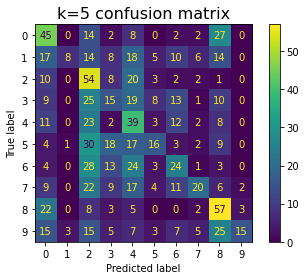

In [46]:
cm1 =confusion_matrix(y_test, predictions[4])
display1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[0,1,2,3,4,5,6,7,8,9])
display1.plot()
plt.title('k=5 confusion matrix', size=16)

It is obvious that in many cases class 8 were predicted as 0 instead and vice versa, nevertheless, many cases of predicted class 2 were predicted incorrectly regarding their true labels.

In [19]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test_pred, y_test)

## Part 2. Logistic Regression

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

In [20]:
class OvR_clf:
    def __init__(self):
        self.preds=[]
        self.mlb = MultiLabelBinarizer()
        self.le = LabelEncoder()
    
    def readData(self, file_name):
        df = pd.read_csv(file_name)
        return df
    
    def labelbinarizer(self,ytrain,ytest):
        y_train = self.mlb.fit_transform(ytrain.reshape(-1,1))
        y_test = self.mlb.fit_transform(ytest.reshape(-1,1))
        return np.array(y_train),np.array(y_test)

    #main function to fit model and prinitng all metrics
    def model_prediction(self,x,y,xtest,ytest):
        for i in range(0,10):
            clf= LogisticRegression(random_state=123,max_iter=10000)
            clf.fit(x, y[:, i])
            ypred = clf.predict(xtest)
            self.preds.append(clf.predict_proba(xtest)[:, 1].reshape(-1, 1))
            print(self.model_accuracy(ytest[:, i], ypred))
            #self.plot_confusion(clf,ytest[:, i],ypred)
        return self.preds

    #predictions using propabilities
    def prob_argmax(self,ytest):
        yb_all = np.hstack((self.preds[0], self.preds[1], self.preds[2], self.preds[3], self.preds[4], self.preds[5], self.preds[6], self.preds[7], self.preds[8], self.preds[9]))
        m = np.argmax(yb_all, axis=1)
        print(m.shape)
        ytest = self.le.fit_transform(ytest)
        # print(ytest.shape())
        print(self.model_accuracy(list(ytest), list(m)))
        return m

    def model_accuracy(self, y_test, predictions, title="OvR Model Accuracy: "):
        return title+"{}%".format(100*accuracy_score(y_test, predictions))

    def plot_confusion(self, ypredict , ytest ):
        cm = confusion_matrix(ypredict, ytest)
        sns.heatmap(cm, annot= True)
        plt.show()
        

    

In [21]:
# ovr.preds[0].shape

In [22]:
ovr = OvR_clf()
y_train_bin, y_test_bin = ovr.labelbinarizer(y_train, y_test)
y_predict = ovr.model_prediction(x_train_flatten, y_train_bin, x_test_flatten, y_test_bin)

OvR Model Accuracy: 88.9%
OvR Model Accuracy: 88.8%
OvR Model Accuracy: 88.7%
OvR Model Accuracy: 86.5%
OvR Model Accuracy: 86.9%
OvR Model Accuracy: 87.8%
OvR Model Accuracy: 88.0%
OvR Model Accuracy: 88.5%
OvR Model Accuracy: 90.3%
OvR Model Accuracy: 88.3%


In [23]:
y_test

array([[3],
       [3],
       [8],
       [5],
       [1],
       [3],
       [4],
       [9],
       [4],
       [3],
       [4],
       [0],
       [9],
       [8],
       [2],
       [2],
       [4],
       [5],
       [2],
       [5],
       [0],
       [9],
       [3],
       [5],
       [1],
       [0],
       [7],
       [3],
       [2],
       [9],
       [8],
       [3],
       [1],
       [9],
       [6],
       [1],
       [7],
       [7],
       [3],
       [3],
       [1],
       [3],
       [0],
       [0],
       [3],
       [0],
       [4],
       [2],
       [3],
       [2],
       [4],
       [8],
       [6],
       [8],
       [2],
       [4],
       [1],
       [4],
       [0],
       [3],
       [4],
       [3],
       [5],
       [7],
       [7],
       [4],
       [2],
       [0],
       [3],
       [6],
       [7],
       [2],
       [8],
       [2],
       [1],
       [4],
       [9],
       [6],
       [2],
       [4],
       [5],
       [8],
       [0],
    

In [24]:
!pip install seaborn

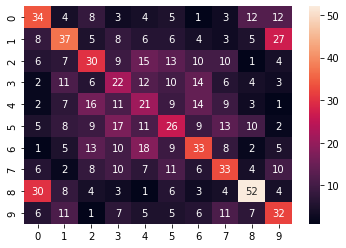

In [25]:
yb_all = np.hstack((ovr.preds[0], ovr.preds[1], ovr.preds[2], ovr.preds[3], ovr.preds[4], ovr.preds[5], ovr.preds[6], ovr.preds[7], ovr.preds[8], ovr.preds[9]))
m = np.argmax(yb_all, axis=1)
ovr.plot_confusion(m, y_test)
# cm = confusion_matrix(m, y_test)
# sns.heatmap(cm, annot= True)

There are clearly some mistakes in prediction in class 0 as class 8 as its origin and in class 9 as its class 1 as its origin.

## Part 3. Support Vector Machine (SVM) Classification

In Part 3. you will use Scikit-learn to perform classification, again on the Cifar10 dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.

### Bonus
Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

In [26]:
x_train_flatten.shape

(5000, 3072)

In [27]:
# Run your SVM experiments here.
clf = LinearSVC(random_state=0)
clf.fit(x_train_flatten, y_train)
y_pred = clf.predict(x_test_flatten)

In [43]:

print('Linear SVM classification baseline accuracy: {:.2f}%'.format(accuracy_score(y_pred,y_test)*100))

Linear SVM classification baseline accuracy: 29.70%


In [29]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
y_pred_c = []
accuracy_of_c = []
for c in C:
    clf = LinearSVC( C=c , multi_class='ovr')
    clf.fit(x_train_flatten, y_train)
    y_pred_c.append(clf.predict(x_test_flatten))
    acc = clf.score(x_test_flatten,y_test)*100
    accuracy_of_c.append(acc)
    print("at C= ",c)
    print("Linear SVM classification accuracy: {:.2f}%".format(accuracy_score(y_pred_c[-1],y_test)*100))

at C=  0.0001
Linear SVM classification accuracy: 34.90%
at C=  0.001
Linear SVM classification accuracy: 36.50%
at C=  0.01
Linear SVM classification accuracy: 36.00%
at C=  0.1
Linear SVM classification accuracy: 31.10%
at C=  1
Linear SVM classification accuracy: 27.70%
at C=  10
Linear SVM classification accuracy: 25.20%
at C=  100
Linear SVM classification accuracy: 24.50%
at C=  1000
Linear SVM classification accuracy: 21.60%


<function matplotlib.pyplot.show(close=None, block=None)>

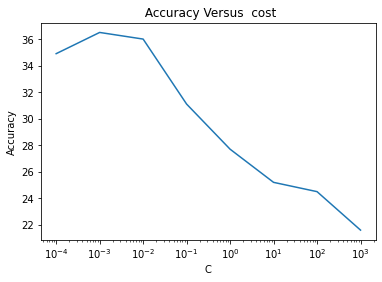

In [30]:
#accuracy_temp=[float(x) for x in y_pred_c] 
plt.plot(C,accuracy_of_c)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title(" Accuracy Versus  cost")
plt.show

In [31]:
y_pred_c_l1 = []
accuracy_of_c_l1 = []

for c in C:
    clf = LinearSVC(random_state=0, C=c, penalty='l1', dual=False)
    clf.fit(x_train_flatten, y_train)
    y_pred_c_l1.append(clf.predict(x_test_flatten))
    acc_l1 = clf.score(x_test_flatten,y_test)*100
    accuracy_of_c_l1.append(acc_l1)
    print("at c= ",c)
    print("Linear SVC classification accuracy with L1 regularization: {:.2f}%".format(accuracy_score(y_pred_c_l1[-1],y_test)*100))

at c=  0.0001
Linear SVC classification accuracy with L1 regularization: 10.00%
at c=  0.001
Linear SVC classification accuracy with L1 regularization: 10.00%
at c=  0.01
Linear SVC classification accuracy with L1 regularization: 26.80%
at c=  0.1
Linear SVC classification accuracy with L1 regularization: 38.40%
at c=  1
Linear SVC classification accuracy with L1 regularization: 29.30%
at c=  10
Linear SVC classification accuracy with L1 regularization: 27.20%
at c=  100
Linear SVC classification accuracy with L1 regularization: 27.20%
at c=  1000
Linear SVC classification accuracy with L1 regularization: 27.10%


<function matplotlib.pyplot.show(close=None, block=None)>

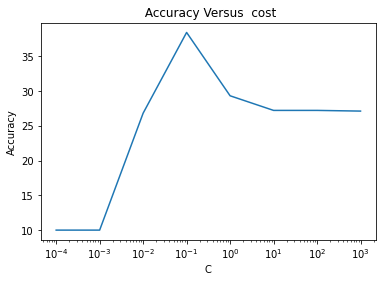

In [32]:
#accuracy_temp=[float(x) for x in y_pred_c] 
plt.plot(C,accuracy_of_c_l1)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title(" Accuracy Versus  cost")
plt.show

In [33]:
Cost = [0.01, 0.1, 1, 10, 100]
Gamma = [0.01, 0.1, 1, 10, 100]
y_pred_svc = []
accuracy_of_svm = []
for gamma in Gamma:
    print('at gamma = ', gamma)

    for cost in Cost:
        clf_svc = SVC(C=cost ,gamma=gamma)
        clf_svc.fit(x_train_flatten, y_train)
        y_pred_svc.append(clf_svc.predict(x_test_flatten))
        acc_svm = clf.score(x_test_flatten,y_test)*100
        accuracy_of_svm.append(acc_svm)
        print("at cost = ",cost)
        print("SVM classification accuracy: {:.2f}%".format(accuracy_score(y_pred_svc[-1],y_test)*100))

at gamma =  0.01
at cost =  0.01
SVM classification accuracy: 28.00%
at cost =  0.1
SVM classification accuracy: 33.60%
at cost =  1
SVM classification accuracy: 43.90%
at cost =  10
SVM classification accuracy: 43.60%
at cost =  100
SVM classification accuracy: 43.40%
at gamma =  0.1
at cost =  0.01
SVM classification accuracy: 10.90%
at cost =  0.1
SVM classification accuracy: 10.90%
at cost =  1
SVM classification accuracy: 18.70%
at cost =  10
SVM classification accuracy: 19.50%
at cost =  100
SVM classification accuracy: 19.50%
at gamma =  1
at cost =  0.01
SVM classification accuracy: 15.70%
at cost =  0.1
SVM classification accuracy: 15.70%
at cost =  1
SVM classification accuracy: 10.40%
at cost =  10
SVM classification accuracy: 10.70%
at cost =  100
SVM classification accuracy: 10.70%
at gamma =  10
at cost =  0.01
SVM classification accuracy: 19.00%
at cost =  0.1
SVM classification accuracy: 19.00%
at cost =  1
SVM classification accuracy: 19.00%
at cost =  10
SVM classific

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


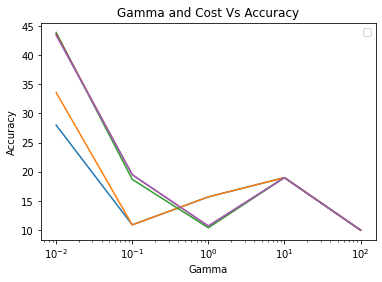

In [84]:
Cost = [0.01, 0.1, 1, 10, 100]
Gamma = [0.01, 0.1, 1, 10, 100]
acc_G_1 = [28,33.6,43.9,43.6,43.4]
acc_G_2 = [10.9,10.9,18.7,19.5,19.5]
acc_G_3 = [15.7,15.7,10.4,10.7,10.7]
acc_G_4 = [19,19,19,19,19]
acc_G_5 = [10,10,10,10,10]
acc_all = [acc_G_1,acc_G_2,acc_G_3,acc_G_4,acc_G_5]


import matplotlib
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(Gamma, acc_all )
ax.set_xscale('log', base =10)
ax.set_xlabel('Gamma')
ax.set_ylabel('Accuracy')
plt.legend()
ax.set_title('Gamma and Cost Vs Accuracy');

In [34]:
C = np.array([0.01,0.1,1,10,100])
acc=[]
for c in C:
    clf =SVC(C=c, kernel='linear',decision_function_shape='ovr')
    clf.fit(x_train_flatten,y_train)
    y_pred = clf.predict(x_test_flatten)
    acc.append(accuracy_score(y_test,y_pred))
    print("the accuracy of C : {0} = {1}%".format(c,acc[-1]))
 

the accuracy of C : 0.01 = 0.379%
the accuracy of C : 0.1 = 0.354%
the accuracy of C : 1.0 = 0.295%
the accuracy of C : 10.0 = 0.297%
the accuracy of C : 100.0 = 0.297%


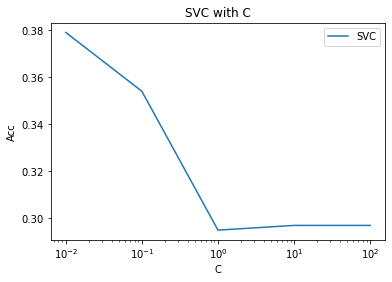

In [38]:
import matplotlib
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.plot(C, acc, label = "SVC")
ax.set_xscale('log', base =10)
ax.set_xlabel('C')
ax.set_ylabel('Acc')
plt.legend()
ax.set_title('SVC with C');

In [39]:
# The best model: Gamma = 0.01, Cost = 1
y_pred_svc = []
accuracy_of_svm = []
clf_svc = SVC(C=1 ,gamma=0.01)
clf_svc.fit(x_train_flatten, y_train)
y_pred_svc_final=(clf_svc.predict(x_test_flatten))
acc_svm = clf.score(x_test_flatten,y_test)*100
accuracy_of_svm.append(acc_svm)
print("at cost = ",cost)
print("SVM classification accuracy: {:.2f}%".format(accuracy_score(y_pred_svc_final,y_test)*100))


at cost =  100
SVM classification accuracy: 43.90%


<function matplotlib.pyplot.show(close=None, block=None)>

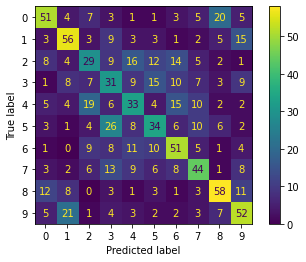

In [40]:
conf_label = range(10)
conf_matrix = confusion_matrix(y_test, y_pred_svc_final, labels=conf_label)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=conf_label)
disp.plot()
plt.show

## Part 4. Conclusion


In KNN The highest accuracy 29.3% was at k=5, while the least accuracy 28% was at k= 1,2. Using OvR, the highest accuracy of a class was 90.3% while the least was 88%. In OvR confusion matrix It is obvious that in many cases class 8 were predicted as 0 instead and vice versa, nevertheless, many cases of predicted class 2 were predicted incorrectly regarding their true labels. In SVM, the maximum accuracy was at C= 0.1 with  38.4% with L1 regularization. Machine learning is limited to capture the features of images since they are complicated, therefore, 5000 samples were used in the training process, but we can use CNN instead for better feature capturing. The best model is SVM with gamma = 0.01, Cost = 1 with 43.9% accuracy which is better than the baseline accuracy of 29.7%.

<!-- Write your conclusion here -->